In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, plot_roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Helper Funktionen

In [2]:
def plot_trennfunktion(X,y, clf, classifier_type):
    if type(X) != np.ndarray:
        X = X.to_numpy()
    if type(y) != np.ndarray:
        y = y.to_numpy()
    cmap = "tab20c"
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01  # Schrittgröße Umso kleiner desto genauer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if classifier_type == "polynom_classifier":
        r_val = np.c_[xx.ravel(), yy.ravel()]
        predictions = clf.predict(pd.DataFrame({"x":r_val[:,0], "y":r_val[:,1]}))
        Z = np.asarray(predictions)
    else: 
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))    
    plt.pcolormesh(xx, yy, Z, cmap=cmap)
    classes_unique = ["Klasse " + str(class_value) for class_value in np.unique(y)]
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=cmap)
    plt.legend(handles=scatter.legend_elements()[0], labels=classes_unique)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
def evaluate_classifier(clf, predictions, y_test, classifier_type):
    accuracy = round(accuracy_score(y_test, predictions),2)
    print("Precision =", round(precision_score(y_test, predictions, pos_label=2),2))
    print("Recall =", round(recall_score(y_test, predictions, pos_label=2),2))
    print("Accuracy =", accuracy)
    print("\033[1mPF (Fehlerwahrscheinlichkeit) =", 1-accuracy, "\033[1m")
    if classifier_type == "regression_classifier":
        classes = [1,2]
        plot_roc_curve(clf, X_test, y_test) 
    classes = [1,2]
    cm = confusion_matrix(y_test, predictions, classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap="Blues")

def get_x(nb, c):
    assert (c==0 or c==1)
    r = c + np.random.rand(nb)
    phi = np.random.rand(nb) * 2 * np.pi
    return np.concatenate(((r * np.sin(phi)).reshape(-1,1), (r * np.cos(phi)).reshape(-1,1)), axis=1)

def generate_non_linear_data(nb_1, nb_2):
    x_0 = get_x(nb_1, 0)
    x_1 = get_x(nb_2, 1)
    X = np.concatenate((x_0, x_1), axis=0)
    t = np.ones(len(X), dtype=int)
    t[len(x_0):] = 2
    p = np.random.permutation(range(len(X)))
    
    X = X[p]
    t = t[p]
    return X, t

def generate_dataset(n_samples, mean, cov):
    x, y = np.random.multivariate_normal(mean, cov, n_samples).T
    return x,y 

def visualise_datasets(x, y, classes, title=""):
    classes_unique = ["Klasse " + str(class_value) for class_value in np.unique(classes)]
    colours = ListedColormap(['b','r'])
    plt.figure(figsize=(10,10))
    plt.title(title)
    scatter = plt.scatter(x, y,c=classes, cmap=colours, alpha=.5)
    plt.legend(handles=scatter.legend_elements()[0], labels=classes_unique)
    plt.grid()
    plt.axis('equal')
    plt.show()

def visualize_correct_wrong(predictions, y_test):
    result_df = pd.DataFrame({"predictions":predictions,"y_true":y_test})
    result_df["correct"] = result_df["predictions"] == result_df["y_true"]
    result_df["color"] = None
    result_df.loc[result_df["correct"] == True, "color"] = "green"
    result_df.loc[result_df["correct"] == False, "color"] = "red"
    plt.figure(figsize=(10,10))
    plt.title("Correct (green) and wrong (red) predictions")
    plt.scatter(X_test["x"], X_test["y"], c=result_df["color"], alpha=0.5)
    plt.grid()
    plt.show()

# Aufgabe 2

## Datenerzeugung

Es werden zwei Datensätze erstellt. Der erste Datensatz hat für Klasse 1 einen Mittelwertsvektor mu von [0,0] und eine Kovarianz Matrix von [[1, 0], [0, 5]]. Klasse 2 einen Mittelwertsvektor mu von [2,4] und eine Kovarianz Matrix von [[5, 0], [0, 1]]. Beide Klassen sind unimodal. Es ist eine Überlappung der zwei Klassen gegeben. 

Der zweite Datensatz ist in Klasse 1 bimodal, da es sich hier um zwei deutlich abgesetzte Klassenzentren handelt (siehe fig 3). Die Klassenzentren der Klasse 1 werden durch die beiden Mittelwertsvektoren [0,0] und [-5,5] beschrieben. Klasse 2 ist unimodal und hat ihren Mittelwertsvektor bei [-5,0]. Somit sind Überlappungen der beiden Klassen gegeben.


### Dataset one

In [3]:
n_samples = 2000
cov_class_one = [[1, 0], [0, 5]]
mean_class_one = [0, 0]
cov_class_two = [[5, 0], [0, 1]]
mean_class_two = [2, 4]
x_one, y_one = generate_dataset(n_samples, mean_class_one, cov_class_one)
x_two, y_two = generate_dataset(n_samples, mean_class_two, cov_class_two)
x_dataset_one, y_dataset_one =  np.concatenate((x_one, x_two)), np.concatenate((y_one, y_two))
classes = [1]*n_samples + [2]*n_samples

In [4]:
dataset_one = pd.DataFrame({
    "x":x_dataset_one,
    "y":y_dataset_one, 
    "class":classes
})

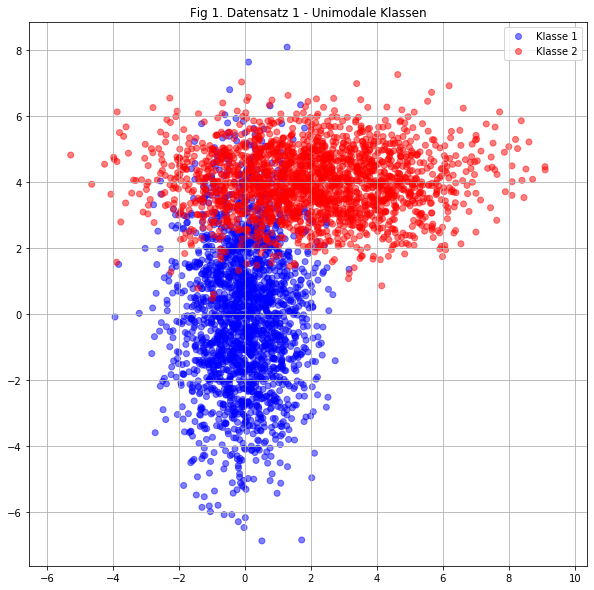

In [5]:
visualise_datasets(dataset_one["x"], dataset_one["y"], dataset_one["class"], "Fig 1. Datensatz 1 - Unimodale Klassen")

### Dataset two

In [6]:
n_samples = 2000
cov_class_one_one = [[1, 0], [0, 5]]
mu_class_one_one = [0, 0]
cov_class_one_two = [[1, 0], [0, 5]]
mu_class_one_two = [-5, 5]
x_one_one, y_one_one = generate_dataset(int(n_samples/2), mu_class_one_one, cov_class_one_one)
x_two_one, y_two_one = generate_dataset(int(n_samples/2), mu_class_one_two, cov_class_one_two)
x_one, y_one = np.concatenate((x_one_one, x_two_one)), np.concatenate((y_one_one, y_two_one))

In [7]:
cov_class_two = [[4, 1], [1, 1]]
mu_class_two = [-5, 0]
x_two, y_two = generate_dataset(n_samples, mu_class_two, cov_class_two)

In [8]:
x_dataset_two, y_dataset_two =  np.concatenate((x_one, x_two)), np.concatenate((y_one, y_two))
classes = [1]*n_samples + [2]*n_samples

In [9]:
dataset_two = pd.DataFrame({
    "x":x_dataset_two,
    "y":y_dataset_two, 
    "class":classes
})

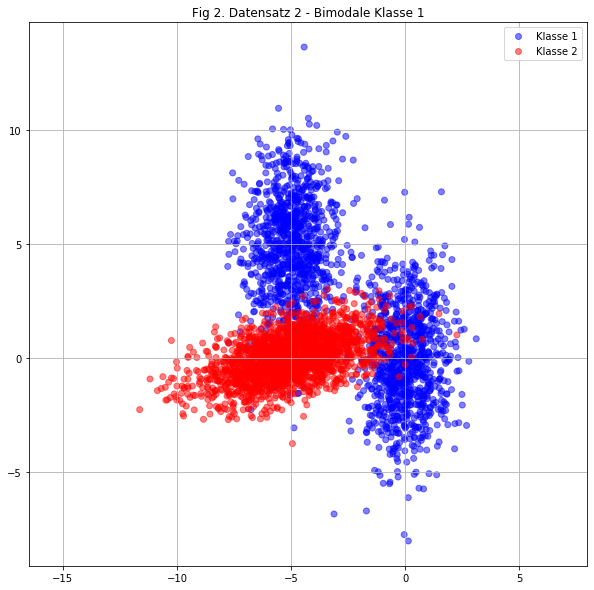

In [10]:
visualise_datasets(dataset_two["x"], dataset_two["y"], dataset_two["class"], "Fig 2. Datensatz 2 - Bimodale Klasse 1")

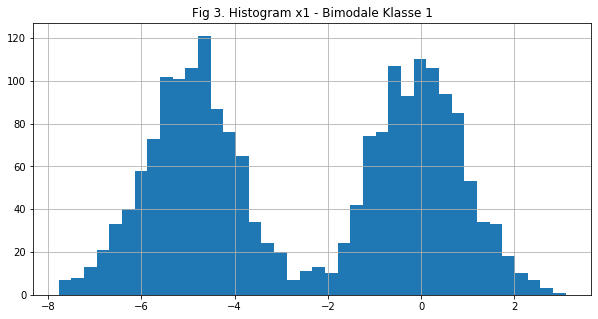

In [11]:
plt.figure(figsize=(10,5))
plt.hist(dataset_two[dataset_two["class"] == 1]["x"],bins=40)
plt.title("Fig 3. Histogram x1 - Bimodale Klasse 1")
plt.grid()
plt.show()

## Polynomklassifikator

In [12]:
# Skript: (x_1^2 x_1*x_2 x_2^2 x_1 x_2)
def helper_vector(data):
    return np.c_[np.square(data['x']), data['x'] * data['y'], np.square(data['y']), data['x'], data['y'], np.ones(len(data['x']))]

def K_invertiert(data):
    cov = 0
    n = len(data)
    for _, d in data.iterrows():
        y = np.array([np.square(d['x']), d['x'] * d['y'], np.square(d['y']), d['x'], d['y'], 1])[:,np.newaxis]
        # Skript: sum(y*y^T)
        cov += y.dot(y.T)

    # Skript: K_yy = 1/n * sum(y*y^T)
    K = (1/n)*cov

    # Skript: Falls K singulär: K^-1 -> K^+ (Pseudoinverse)
    if np.linalg.det(K) == 0:
        k_invertiert = np.linalg.pinv(K)
    else:
        k_invertiert = np.linalg.inv(K)

    return k_invertiert

class QPK:
    def fit(self,X,y):
        merged_data = X_train.merge(y_train,left_index=True,right_index=True)
        data_1 = merged_data[(merged_data['class'] == 1)]
        data_2 = merged_data[(merged_data['class'] == 2)]

        n_1 = y.value_counts()[1]
        n_2 = y.value_counts()[2]
        n = n_1 + n_2

        y_1 = helper_vector(data_1).T
        y_2 = helper_vector(data_2).T

        m_1 = np.mean(y_1, axis=1)
        m_2 = np.mean(y_2, axis=1)

        # Skrip: w = 1/n*K_yy^-1 (n_1*m_1-n_2*m_2)
        self.w = 1/n * K_invertiert(X).dot(n_1*m_1[:,np.newaxis] - n_2*m_2[:,np.newaxis])

    def predict(self, data):
        # Skript: w^T*y
        predictions = self.w.T.dot(helper_vector(data).T)[0]
        return np.where(predictions > 0, 1,2)

## Dataset 1

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset_one[["x","y"]], dataset_one["class"], test_size=0.3)

In [14]:
qpk = QPK()
qpk.fit(X_train, y_train)
predictions = qpk.predict(X_test)

Precision = 0.91
Recall = 0.93
Accuracy = 0.92
PF (Fehlerwahrscheinlichkeit) = 0.07999999999999996 


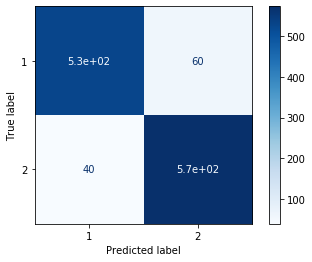

In [15]:
evaluate_classifier(qpk, predictions, y_test.to_numpy(), "polynom_classifier")

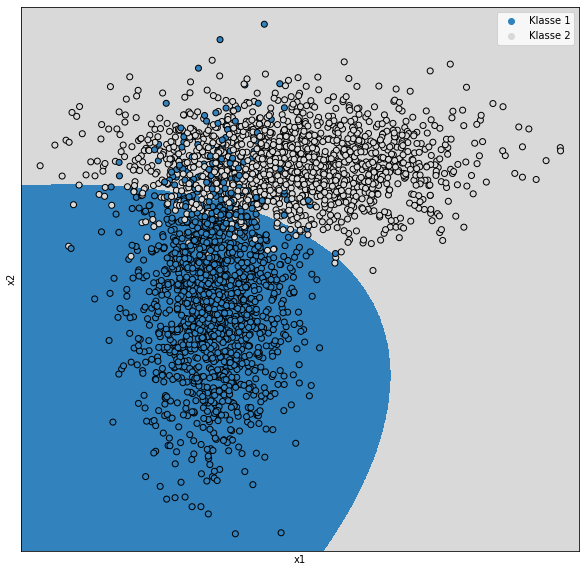

In [16]:
plot_trennfunktion(X_train, y_train, qpk, "polynom_classifier")

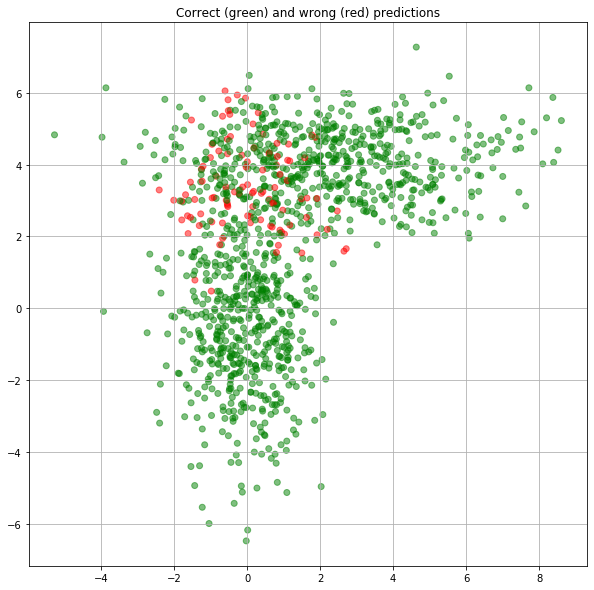

In [17]:
visualize_correct_wrong(predictions, y_test)

## Dataset 2

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataset_two[["x","y"]], dataset_two["class"], test_size=0.3)

In [19]:
qpk = QPK()
qpk.fit(X_train, y_train)
predictions = qpk.predict(X_test)

Precision = 0.9
Recall = 0.92
Accuracy = 0.91
PF (Fehlerwahrscheinlichkeit) = 0.08999999999999997 


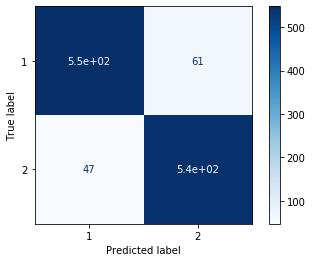

In [20]:
evaluate_classifier(qpk, predictions, y_test.to_numpy(), "polynom_classifier")

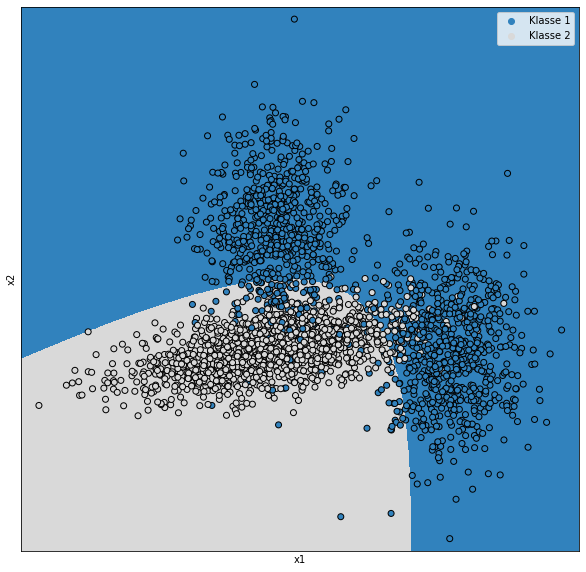

In [21]:
plot_trennfunktion(X_train, y_train, qpk, "polynom_classifier")

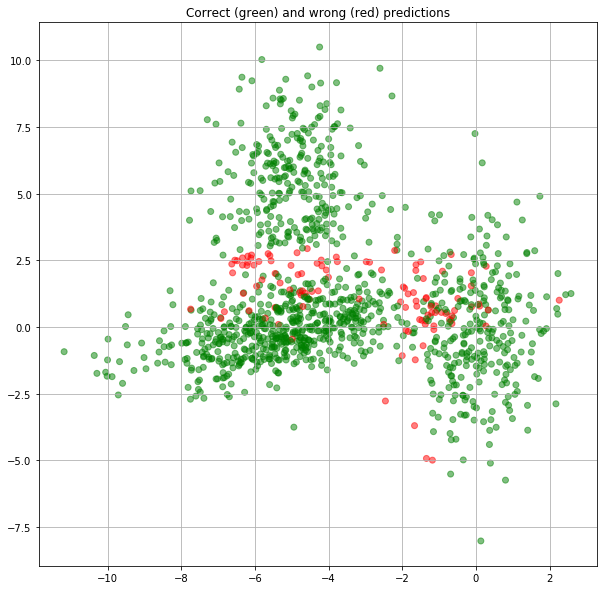

In [22]:
visualize_correct_wrong(predictions, y_test)

# Aufgabe 3 - Logistic Regression Klassifikator

## Datensatz 1

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataset_one[["x","y"]], dataset_one["class"], test_size=0.3)

Precision = 0.9
Recall = 0.93
Accuracy = 0.92
PF (Fehlerwahrscheinlichkeit) = 0.07999999999999996 


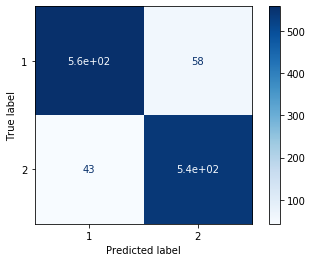

In [24]:
logistic_regression_clf = LogisticRegression().fit(X_train, y_train)
predictions = logistic_regression_clf.predict(X_test)
evaluate_classifier(logistic_regression_clf, predictions, y_test, "logistic_regression_classifier")

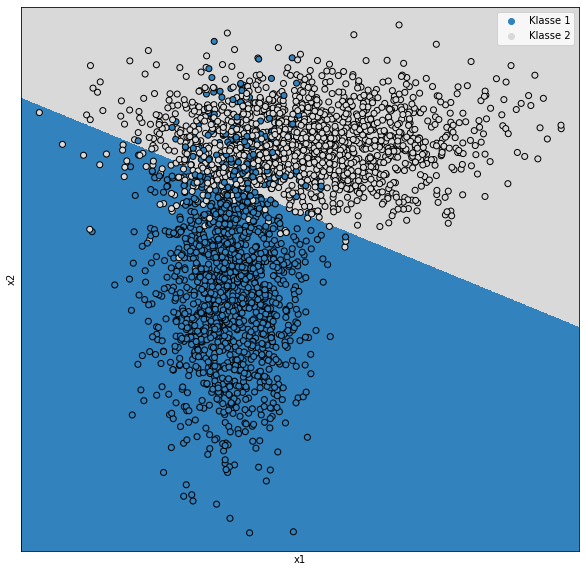

In [25]:
plot_trennfunktion(X_train,y_train, logistic_regression_clf, "logistic_regression_classifier")

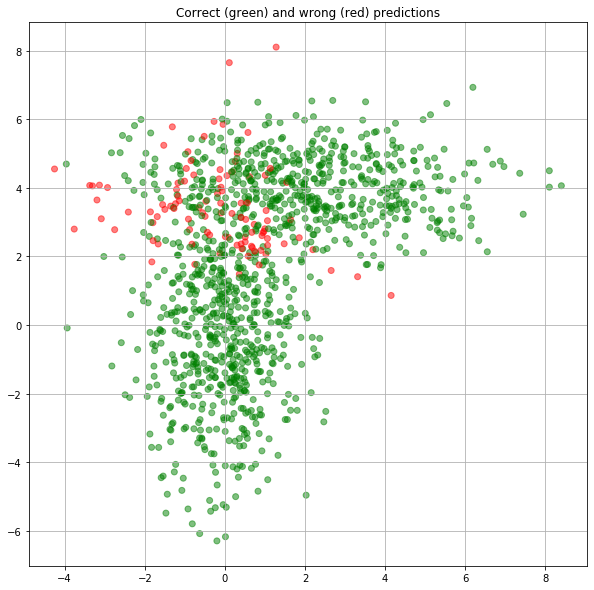

In [26]:
visualize_correct_wrong(predictions, y_test)

## Datensatz 2

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataset_two[["x","y"]], dataset_two["class"], test_size=0.3)

Precision = 0.83
Recall = 0.83
Accuracy = 0.83
PF (Fehlerwahrscheinlichkeit) = 0.17000000000000004 


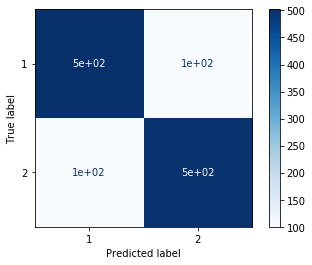

In [28]:
logistic_regression_clf = LogisticRegression().fit(X_train, y_train)
predictions = logistic_regression_clf.predict(X_test)
evaluate_classifier(logistic_regression_clf, predictions, y_test, "logistic_regression_classifier")

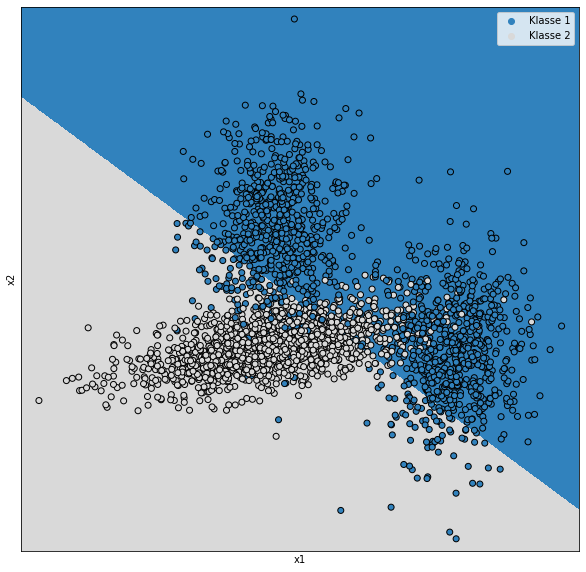

In [29]:
plot_trennfunktion(X_train,y_train, logistic_regression_clf, "logistic_regression_classifier")

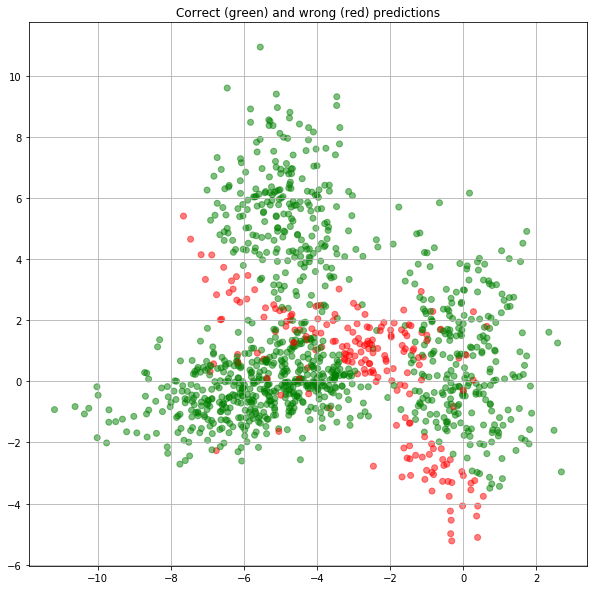

In [30]:
visualize_correct_wrong(predictions, y_test)

## Wie werden die Parameter über eine Optimierung bestimmt?

Während des Trainingvorgangs (in unserem Fall mit 70% des gesamten Datensatzes) werden die Parameter beim Logistic Regression Klassifikator über die numerische Minimierung der negativen Log-Likelihood Funktion bestimmt. 

Die Idee der Likelihood Methode ist es, durch das Variieren der Parameter jene Verteilung der Parameter zu finden, bei welcher die Wahrscheinlichkeit der gemessenen Daten maximal ist. 

## Quadratisch nicht lineare Merkmale - Vergleich

In [31]:
X, y = generate_non_linear_data(2000, 2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

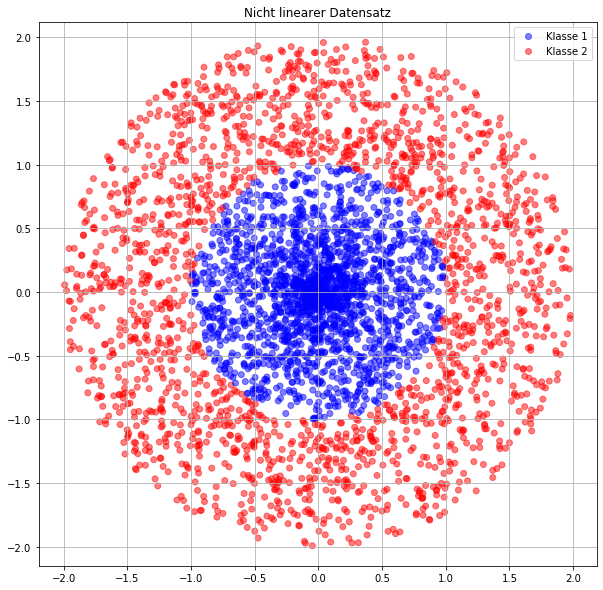

In [32]:
visualise_datasets(X[:,0], X[:,1], y, title="Nicht linearer Datensatz")

## Logistic Regression Klassifikator 

Precision = 0.41
Recall = 0.61
Accuracy = 0.38
PF (Fehlerwahrscheinlichkeit) = 0.62 


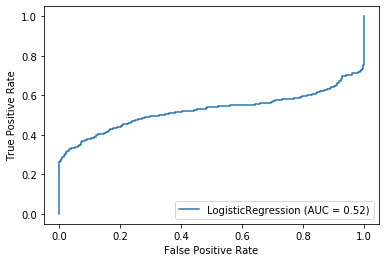

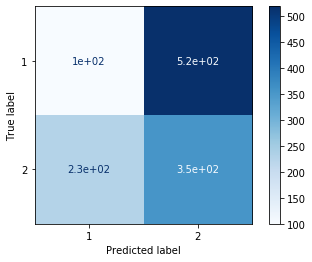

In [33]:
logistic_regression_clf = LogisticRegression().fit(X_train, y_train)
predictions = logistic_regression_clf.predict(X_test)
evaluate_classifier(logistic_regression_clf, predictions, y_test, "regression_classifier")

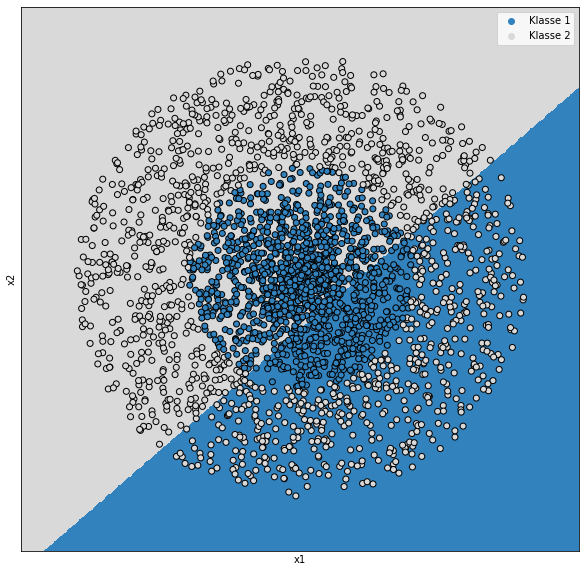

In [34]:
plot_trennfunktion(X_train,y_train, logistic_regression_clf, "regression_classifier")

## Quadratischer Polynom Klassifikator 

In [35]:
X, y = generate_non_linear_data(2000, 2000)
X = pd.DataFrame({"x":X[:,0], "y":X[:,1]})
y = pd.Series(data=y,name="class").replace(0,2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
qpk = QPK()
qpk.fit(X_train, y_train)
predictions = qpk.predict(X_test)

Precision = 1.0
Recall = 0.82
Accuracy = 0.91
PF (Fehlerwahrscheinlichkeit) = 0.08999999999999997 


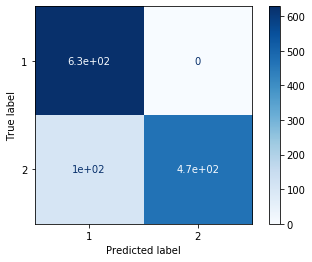

In [37]:
evaluate_classifier(qpk, predictions, y_test, "polynom_classifier")

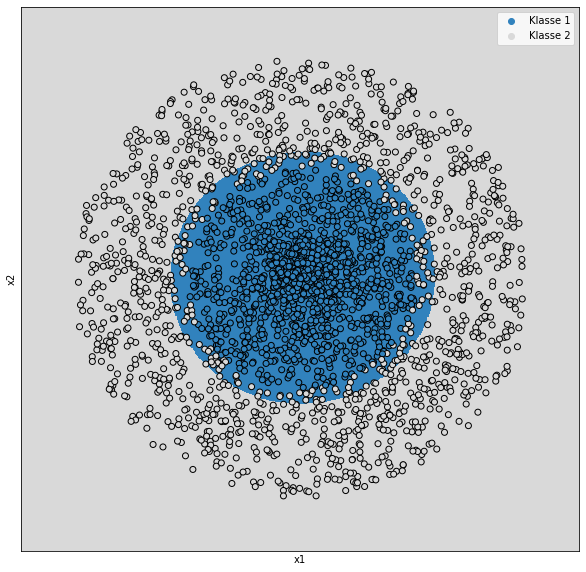

In [38]:
plot_trennfunktion(X_train,y_train, qpk, "polynom_classifier")

Es lässt sich erkennen, dass der Logistic Regression Klassifikator nicht lineare Merkmale nicht korrekt klassifizieren kann, da es nicht möglich ist die gegebenen Merkmale mit einer linearen Trennfunktion zu separieren. 

Da der Polynom Klassifikator in dieser Aufgabe quadtratisch ist, ist es möglich mit diesem eine geringe Fehlerwahrscheinlichkeit PF auch bei nicht linearen Merkmalen zu erreichen.